# Cournot Competition under Yield Uncertainty
Applied Economic Analysis 1, Januari 2018

|Name|examnr.|
|----|-------|
|Amber Tjeerdsma|1263180|
|Carolina Miranda Duarte|1277810|



# Research Question

What is the impact of production yield uncertainty on the equilibrium outcome in a Cournot duopoly? 

# Motivation

Many competitive industries are characterized by substantial yield uncertainty in their production process. By studying the impact of yield uncertainty on strategic decisions of the firm such as entry and production quantity, we can analyze how process improvement leads to differences in competition. We base our model on that of [Deo & Corbett (2009)](https://pubsonline.informs.org/doi/pdf/10.1287/msom.1080.0242), with some alterations in the assumptions, to fit a duopoly Cournot model with production cost homogeneity. 

Yield uncertainty has not been looked into extensively in the literature as an important factor in market competition. Yet it has been found, by [Deo & Corbett (2009)](https://pubsonline.informs.org/doi/pdf/10.1287/msom.1080.0242), to contribute to a high degree of market concentration and simultaneously to lower total industry output. While market concentration has typically been attributed to low prices, insufficient incentives and uncertain demand, this does not have consistent empirical support. Yield uncertainty thus offers an alternative explanation. Industries with high levels of yield uncertainty include semiconductors, food processing, biopharmaceuticals, and more notably, the agriculture and mining sectors, which collectively form a substantial part of aggregate income in developing and some emerging economies. It is, therefore, important to investigate the impact of such uncertainty on strategic behavior. See [map](#map).

We establish a two-stage game following the Cournot model, solved using backwards induction. The first stage consists of the two firms deciding whether or not to enter the market, by incurring fixed cost of entry $F$. The second stage consists of both firms selecting their target production quantity. 

We include sensitivity analyses, showing that the model provides results that match the theory. Additionally, checking for robustness provides information about the mechanisms at play both in equilibrium and otherwise. 


<a id='map'></a>


# Map


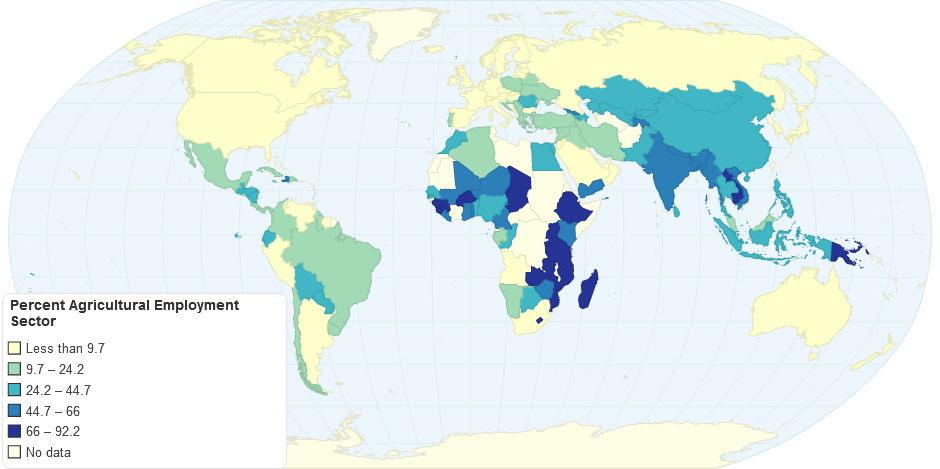

In [56]:
from IPython.display import Image
Image("http://cdn3.chartsbin.com/chartimages/l_4901_0150effaa0c6f2d90ce2f8ef4cc73f08.png")

# Method

We will analyze the impact of production yield uncertainty on the equilibrium outcome and the social optimum for the Cournot model of duopolistic competition. We will base our model on the paper by [Deo & Corbett (2009)](https://pubsonline.informs.org/doi/pdf/10.1287/msom.1080.0242), but adapting it to a duopoly case with endogenous entry. 

# Answer

Our [conclusion](#conclusion) is that yield uncertainty impacts equilibrium outcome in a cournot duopoly by two means. 

Firstly, low levels of yield can lead to no production in the [second stage](#2stage) due to expected profits that are lower than zero. Furthermore, for high levels of uncertainty yield quantity is declining in uncertainty yield. Meaning that for a large yield, less production is needed to reach an optimal quantity in the market, because a larger share of the targeted quanitity is actually produced. 

Secondly, low levels of  uncertainty yield can lead to firms not entering the market in the [first stage](#1stage).   
Low levels of uncertainty yield decrease the expected profits of the firm, thereby making it less profitable to enter the market when entry costs are in place. As shown in the [sensitivity analysis](#Sensa), when there are no entry costs, the yield does not influence entry decisions as in this case both firms will enter the market for each level of the uncertainty yield.

# Main Assumptions

* The industry has two firms with identical manufacturing processes, meaning that they have identical costs $c_1$ and $c_2$ and face the same yield uncertainty $\alpha$. 


* $\overline{q_i}$ is the production quantity targeted, while actual quantity produced is given by $q_i = \alpha\overline{q_i}$, where $\alpha$ is a random variable indicating yield.


* $\alpha$ is a random variable indicating yield. We assume $\alpha$ is independently and identically distributed on a discrete distribution function. It can take on any value of the list $[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]$


#  The Model

We assume a model of an industry with two firms. The model is a two-stage game which will be solved using backward induction. In the [first stage](#1stage), the firms simultaneously decide whether to enter the market by incurring a fixed cost of entry $F$. 

In the [second stage](#2stage), each entering firm selects the target production quantity. Then, each firm’s production yield is realized, the actual quantity produced is brought to the market, and price emerges according to the traditional model of Cournot competition. Price is set according to the inverse linear demand function, $p = a - b(q_1 + q_2)$.
As the firms have an identical manufacturing processes, meaning that they have identical costs. $\overline{q_i}$ is the production quantity targeted, while actual quantity produced is given by $q_i = \alpha\overline{q_i}$, where $\alpha$ is a random variable indicating yield.


# Variables and Parameters

Endogenous Variables |Definition
:----------|:----------
$\overline{q_i}$| target production quantity for firm $i$
$q_i$|actual production quantity for firm $i$
$\pi_i$|expected profits for firm $i$



Exogenous Parameters |Definition
:----------|:----------
$\alpha$| random variable reflecting the yield uncertainty
$c_1$|expected production costs before production proces
$c_2$|observed production costs after production proces
$F$ | Fixed costs of entering the market


# Importing Libraries

In [57]:
from scipy import optimize,arange
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<a id='2stage'></a>

# Second Stage


We solve this two-stage game using backward induction. We first solve the second stage game, and derive the equilibrium target production quantities and profit as a function  of this number. 

In the second stage, given that there are n firms in the industry, each firm decides a target quantity $\overline{q_i}$ at a cost of $c_1\overline{q_i}$. The uncertainty is resolved during the production process, and $q_i = \alpha_i\overline{q_i}$ is the actual quantity produced at a cost of $c_2q_i$. We obtain 
$$\pi_i(\overline{q_i}) = E\bigg[ \bigg( a - b \bigg(\sum_{j=1}^n \alpha_j \overline{q_j} \bigg) \bigg) \alpha_i\overline{q_i} -(c_1 + \alpha_ic_2)\overline{q_i}\bigg]$$ 

In [58]:
def price(q_i,q_j):
    return a - b*(q_i + q_j)

def profit_2nd_stage(q_i, q_j, c_1, c_2):
    return (a - (b*alpha*(q_i + q_j)))*(alpha*q_i) - (c_1 + alpha*c_2)*q_i


#  Baseline Scenario

We want to determine firm $i$'s optimal output level as a response to the firms' output level of firm $j$, that is an output level that maximizes profits. Furthermore, we want to find an equilibrium of these two optimal output levels, by finding the fixed points of the two reaction functions. 

We start with a baseline scenario in which the firms produce homogenous goods ($a = 1$ and $b = 1$) and where both $c_1$ (expected costs before knowing actual quantity) and $c_2$ (costs after knowing actual quantity produced) are $0$.

In [59]:
#Baseline scenario

a = 1
b = 1

c_1 = 0
c_2 = 0

alpha = 1


In [60]:
def reaction(q_j):
    
    q_firm_i = optimize.fminbound(lambda x: -profit_2nd_stage(x, q_j, c_1, c_2),0,1,full_output=1)
    
    if q_firm_i[1] > 0: 
        q_i = 0
    else:
        q_i = q_firm_i[0]
        
    return q_i

To find an equilibrium, we are looking for a fixed point. 

In [61]:
def fixed_point(q):
    return [q[0]-reaction(q[1]),q[1]-reaction(q[0])]

initial_guess = [0,0]

optimize.fsolve(lambda q: fixed_point(q), initial_guess)

array([ 0.33333333,  0.33333333])

We can plot these reaction functions to see the fixed point graphically

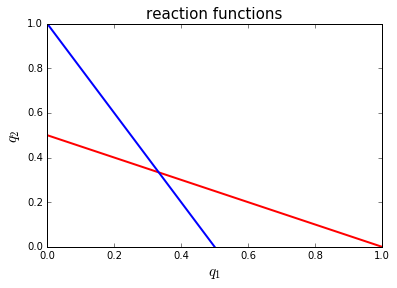

In [62]:
range_q = arange(0,1.1,0.1)
firm_1_reaction = [reaction(q0) for q0 in range_q]

plt.clf()
 
plt.plot(range_q, firm_1_reaction,'-', color = 'r', linewidth = 2)
plt.plot(firm_1_reaction, range_q,'-', color = 'b', linewidth = 2)
plt.title("reaction functions",fontsize = 15)
plt.xlabel("$q_1$",fontsize = 15)
plt.ylabel("$q_2$",fontsize = 15,rotation = 90)
#plt.xlim(0.1,1.0)
#plt.ylim(0.0,2.0)
plt.savefig('reaction_functions.png')

#  Variations in Yield Uncertainty

Now we will do a number of simulations for different levels of yield uncertainty. In order to see the effect of  variations in yield uncertainty, we need a positive value for $c_1$ and $c_2$. Therefore, we change the values of $c_1$ and $c_2$ compared to the baseline scenario.


In [63]:
#Positive cost values

a = 1
b = 1

c_1 = 0.1
c_2 = 0.1

We create a pandas dataframe to easily store the outcomes of these variations in yield uncertainty.

In [64]:
columns = ['alpha','[q_1, q_2]']
df_variations = pd.DataFrame(columns=columns)
range_alpha = arange(0,1,0.1)
counter = 0
for i in range(len(range_alpha)):
    for j in range(1):
        counter = counter +1
        alpha = range_alpha[i]
        df_variations.loc[counter] = [alpha, optimize.fsolve(lambda q: fixed_point(q), initial_guess)]
        
print (df_variations)

    alpha                        [q_1, q_2]
1     0.0                        [0.0, 0.0]
2     0.1                        [0.0, 0.0]
3     0.2  [0.666666666667, 0.666666666667]
4     0.3    [0.62962962963, 0.62962962963]
5     0.4  [0.541666666667, 0.541666666667]
6     0.5  [0.466666666667, 0.466666666667]
7     0.6  [0.407407407407, 0.407407407407]
8     0.7  [0.360544217687, 0.360544217687]
9     0.8  [0.322916666667, 0.322916666667]
10    0.9  [0.292181069959, 0.292181069959]


Now we will make a new panda dataframe with the total quantity as one of the variables, such that we can graph the effect of the yield uncertainty on the market outcome, e.g. the total quantity produced. 

In [65]:
#Even though this calculation gives a warning, the results are unaffected. For clarity, we switch off the warnings.

import warnings
warnings.filterwarnings("ignore")

In [66]:
columns = ['alpha','Q']
df_simulations = pd.DataFrame(columns=columns)
range_alpha = arange(0,1,0.1)
counter = 0
for i in range(len(range_alpha)):
    for j in range(1):
        counter = counter +1
        alpha = range_alpha[i]
        df_simulations.loc[counter] = [alpha, sum(optimize.fsolve(lambda q: fixed_point(q), initial_guess))]
        
print (df_simulations)


    alpha         Q
1     0.0  0.000000
2     0.1  0.000000
3     0.2  1.333333
4     0.3  1.259259
5     0.4  1.083333
6     0.5  0.933333
7     0.6  0.814815
8     0.7  0.721088
9     0.8  0.645833
10    0.9  0.584362


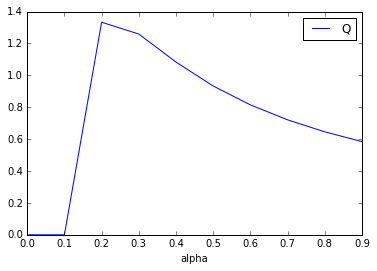

In [67]:
df_simulations.plot(x='alpha', y='Q')

We find that for the scenario with positive cost values, an $\alpha$ below 0.1 results in zero quantity produced. That is, it is unprofitable to produce when of the target production $\overline{q_i}$ only $0.1\overline{q_i}$ is actually produced. for $\alpha \ge 0.2$ it is profitable to produce a quantity larger than zero ($q_i > 0$) and quantity is declining in $\alpha$. Meaning that for a large yield, less production is needed to reach an optimal quantity in the market, because a larger share of the targeted quanitity is actually produced. 

In the [sensitivity analysis](#Sensa) we will analyze the effect of uncertainty yield on the market outcomes under different assumptions of the parameters $c_1$, $c_2$, $a$ and $b$.

<a id='1stage'></a>

# First stage 

Next, we focus on the first stage of the game. The two firms simultaneously decide whether to enter the market or not. Both of the firms have a reservation profit level of zero.  

When profits (as determined by the reaction function) are larger than fixed cost $F$, a firm will decide to enter. Here, we are initially assuming the baseline model ( $a = 1, b = 1, c_1 = c_2 = 0, \alpha = 1$). 

We want to find the cutoff point of $\alpha$ for which the firms will decide to enter. We again start with the baseline scenario ($a = b = 1$ and $c_1 = c_2$). As the firms are assumed to be homogenous, they have the same profit function and therefore they will face the same entry decision.

In [68]:
#Baseline scenario

a = 1
b = 1

c_1 = 0
c_2 = 0

For now we are assuming a fixed cost of 0.1. In the [sensitivity analysis](#Sensa) we will analyse how the results change for different levels of $F$.

In [69]:
F = 0.1

In [70]:
def entry (F,profit_2nd_stage):
    return 0 if profit_2nd_stage((optimize.fsolve(lambda q: fixed_point(q), initial_guess))[0], (optimize.fsolve(lambda q: fixed_point(q), initial_guess))[1], c_1, c_2) < F else 1

columns = ['alpha','[q_1,q_2]','Profits','entry']
df_simulations = pd.DataFrame(columns=columns)
range_alpha = arange(0,1,0.1)
counter = 0
for i in range(len(range_alpha)):
    for j in range(1):
        counter = counter +1
        alpha = range_alpha[i]
        df_simulations.loc[counter] = [alpha, (optimize.fsolve(lambda q: fixed_point(q), initial_guess)), profit_2nd_stage((optimize.fsolve(lambda q: fixed_point(q), initial_guess))[0], (optimize.fsolve(lambda q: fixed_point(q), initial_guess))[1], c_1, c_2), entry(F,profit_2nd_stage)]
print(df_simulations)


    alpha                         [q_1,q_2]   Profits  entry
1     0.0  [0.999994039139, 0.999994039139]  0.000000    0.0
2     0.1  [0.999994039139, 0.999994039139]  0.080000    0.0
3     0.2  [0.999994039139, 0.999994039139]  0.120000    1.0
4     0.3  [0.999994039139, 0.999994039139]  0.120000    1.0
5     0.4  [0.833333333333, 0.833333333333]  0.111111    1.0
6     0.5  [0.666666666667, 0.666666666667]  0.111111    1.0
7     0.6  [0.555555555556, 0.555555555556]  0.111111    1.0
8     0.7    [0.47619047619, 0.47619047619]  0.111111    1.0
9     0.8  [0.416666666667, 0.416666666667]  0.111111    1.0
10    0.9    [0.37037037037, 0.37037037037]  0.111111    1.0


We find that in the baseline scenario and with $F = 0.1$, the firms will enter when the yield uncertainty is 0.2 or higher ($\alpha \ge 0.2$).

<a id='Sensa'></a>

# Sensitivity Analysis

#  Second Stage
In the sensitivty analysis of the [second stage](#2stage), we want to measure how changes in the assumed costs $c_1$ and $c_2$ and $a$ and $b$ will affect the outcomes regarding the effect of yield uncertainty on market outcomes. Therefore, we present different cases and analyze the impact of these changes.


#  Variations in costs


In [71]:
#Case 1 

a = 1
b = 1

c_1 = 0.1
c_2 = 0.3

In [72]:
columns = ['alpha','Q']
df_variations = pd.DataFrame(columns=columns)
range_alpha = arange(0,1,0.1)
counter = 0
for i in range(len(range_alpha)):
    for j in range(1):
        counter = counter +1
        alpha = range_alpha[i]
        df_variations.loc[counter] = [alpha, sum(optimize.fsolve(lambda q: fixed_point(q), initial_guess))]

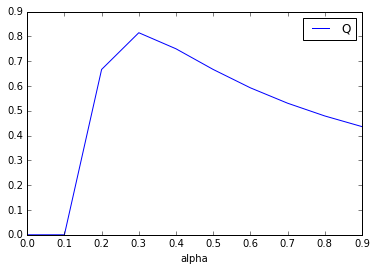

In [73]:
df_variations.plot(x='alpha', y='Q')

For the case of $c_1 = 0.1$ and $c_2 = 0.3$ we again find that an $\alpha$ below 0.1 results in zero quantity produced. The expected profits from producing in case of $\alpha \le 0.1$ are zero. For $\alpha \ge 0.2$, $q_i > 0$. Quantity is inclining in $\alpha$ for $0.2 \le \alpha \le 0.3 $ and declining in $\alpha$ for $\alpha > 0.3$.

In [74]:
#Case 2 

a = 1
b = 1

c_1 = 0.4
c_2 = 0.5


In [75]:
columns = ['alpha','Q']
df_variations = pd.DataFrame(columns=columns)
range_alpha = arange(0,1,0.1)
counter = 0
for i in range(len(range_alpha)):
    for j in range(1):
        counter = counter +1
        alpha = range_alpha[i]
        df_variations.loc[counter] = [alpha, sum(optimize.fsolve(lambda q: fixed_point(q), initial_guess))]


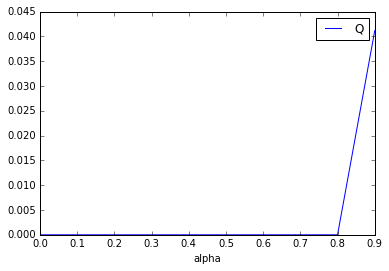

In [76]:
df_variations.plot(x='alpha', y='Q')

For the case of $c_1 = 0.4$ and $c_2 = 0.5$ we find that an $\alpha$ below 0.8 results in zero quantity produced. The expected profits from producing in case of $\alpha \le 0.8$ are zero. For $\alpha > 0.8$, it is profitable to produce, $q_i > 0$.

In [77]:
#Case 3 

a = 1
b = 1

c_1 = 0.5
c_2 = 0.4

In [78]:
columns = ['alpha','Q']
df_variations = pd.DataFrame(columns=columns)
range_alpha = arange(0,1,0.1)
counter = 0
for i in range(len(range_alpha)):
    for j in range(1):
        counter = counter +1
        alpha = range_alpha[i]
        df_variations.loc[counter] = [alpha, sum(optimize.fsolve(lambda q: fixed_point(q), initial_guess))]


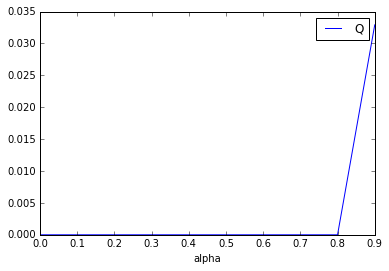

In [79]:
df_variations.plot(x='alpha', y='Q')

For the case of $c_1 = 0.5$ and $c_2 = 0.4$ we find  the same outcome as for case 2. An $\alpha$ below 0.8 results in zero quantity produced. The expected profits from producing in case of $\alpha \le 0.8$ are zero. For $\alpha > 0.8$, it is profitable to produce, $q_i > 0$.

In [80]:
#Case 4

a = 1
b = 1

c_1 = 0.3
c_2 = 0.1


In [81]:
columns = ['alpha','Q']
df_variations = pd.DataFrame(columns=columns)
range_alpha = arange(0,1,0.1)
counter = 0
for i in range(len(range_alpha)):
    for j in range(1):
        counter = counter +1
        alpha = range_alpha[i]
        df_variations.loc[counter] = [alpha, sum(optimize.fsolve(lambda q: fixed_point(q), initial_guess))]


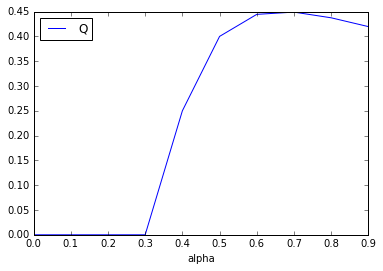

In [82]:
df_variations.plot(x='alpha', y='Q')

For the case of $c_1 = 0.53$ and $c_2 = 0.1$ we find that an $\alpha$ below 0.3 results in zero quantity produced. Meaning that the expected profits from producing in case of $\alpha \le 0.3$ are zero. For $\alpha > 0.3$, it is profitable to produce, and the effect of $\alpha$ on optimal quantity produced follows a covex shape. That is, the optimal quantity first increases with an increase in $\alpha$, then levels off and finally decreases for a higher value of $\alpha$.

#  Non-homogeneous goods

By changing the values of the parameters $a$ and $b$ we stretch the assumption of homogenous goods. Hence, the values of a and b differ.

In [83]:
#Case 1 

a = 1.3
b = 1

c_1 = 0.1
c_2 = 0.1


In [84]:
columns = ['alpha','Q']
df_variations = pd.DataFrame(columns=columns)
range_alpha = arange(0,1,0.1)
counter = 0
for i in range(len(range_alpha)):
    for j in range(1):
        counter = counter +1
        alpha = range_alpha[i]
        df_variations.loc[counter] = [alpha, sum(optimize.fsolve(lambda q: fixed_point(q), initial_guess))]


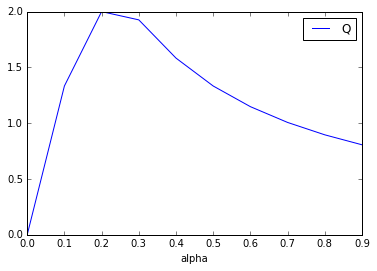

In [85]:
df_variations.plot(x='alpha', y='Q')

We find that with a higher reservation price, for any level of $\alpha > 0$ it is profitable to produce. Furthermore, the effect of $\alpha$ on optimal quantity produced increases for $0 < \alpha < 0.2$ and decreases for $\alpha \ge 0.2$

In [86]:
#Case 2 

a = 1.5
b = 1

c_1 = 0.1
c_2 = 0.1


In [87]:
columns = ['alpha','Q']
df_variations = pd.DataFrame(columns=columns)
range_alpha = arange(0,1,0.1)
counter = 0
for i in range(len(range_alpha)):
    for j in range(1):
        counter = counter +1
        alpha = range_alpha[i]
        df_variations.loc[counter] = [alpha, sum(optimize.fsolve(lambda q: fixed_point(q), initial_guess))]


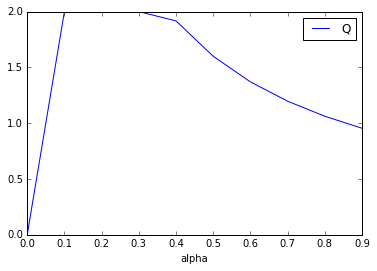

In [88]:
df_variations.plot(x='alpha', y='Q')

By comparing case 1 and case 2, we find that with a higher reservation price, the higher optimal production is for low levels of $\alpha$. Optimal production decreases with an increase in $\alpha$.

In [89]:
#Case 3

a = 1.5
b = 1.3

c_1 = 0.1
c_2 = 0.1


In [90]:
columns = ['alpha','Q']
df_variations = pd.DataFrame(columns=columns)
range_alpha = arange(0,1,0.1)
counter = 0
for i in range(len(range_alpha)):
    for j in range(1):
        counter = counter +1
        alpha = range_alpha[i]
        df_variations.loc[counter] = [alpha, sum(optimize.fsolve(lambda q: fixed_point(q), initial_guess))]

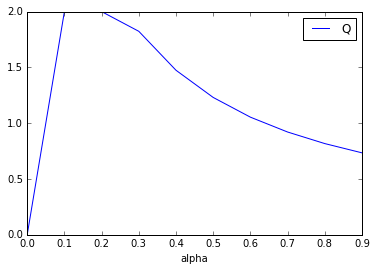

In [91]:
df_variations.plot(x='alpha', y='Q')

In [92]:
#Case 4

a = 1
b = 1.3

c_1 = 0.1
c_2 = 0.1


In [93]:
columns = ['alpha','Q']
df_variations = pd.DataFrame(columns=columns)
range_alpha = arange(0,1,0.1)
counter = 0
for i in range(len(range_alpha)):
    for j in range(1):
        counter = counter +1
        alpha = range_alpha[i]
        df_variations.loc[counter] = [alpha, sum(optimize.fsolve(lambda q: fixed_point(q), initial_guess))]


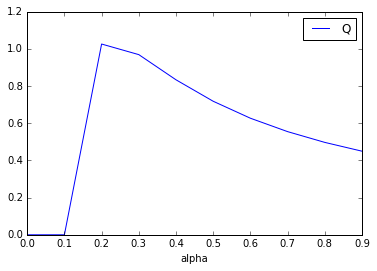

In [94]:
df_variations.plot(x='alpha', y='Q')

By comparing case 3 and case 4, we find no difference for an increase in $a$ of 0.5, given that $b$ is equal to 1.3.

In [95]:
#Case 5

a = 1
b = 1.5

c_1 = 0.1
c_2 = 0.1

In [96]:
columns = ['alpha','Q']
df_variations = pd.DataFrame(columns=columns)
range_alpha = arange(0,1,0.1)
counter = 0
for i in range(len(range_alpha)):
    for j in range(1):
        counter = counter +1
        alpha = range_alpha[i]
        df_variations.loc[counter] = [alpha, sum(optimize.fsolve(lambda q: fixed_point(q), initial_guess))]


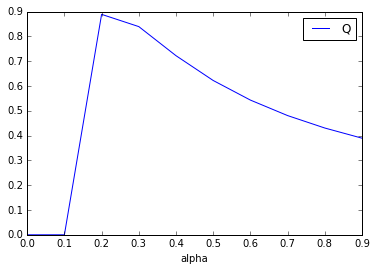

In [97]:
df_variations.plot(x='alpha', y='Q')

By comparing case 4 and 5 we find that the parameter $b$ changes the level of optimal quantity. The higher $b$, the lower the optimal quantity produced given $\alpha$. 

In [98]:
#Case 6

a = 1.3
b = 1.5

c_1 = 0.1
c_2 = 0.1


In [99]:
columns = ['alpha','Q']
df_variations = pd.DataFrame(columns=columns)
range_alpha = arange(0,1,0.1)
counter = 0
for i in range(len(range_alpha)):
    for j in range(1):
        counter = counter +1
        alpha = range_alpha[i]
        df_variations.loc[counter] = [alpha, sum(optimize.fsolve(lambda q: fixed_point(q), initial_guess))]


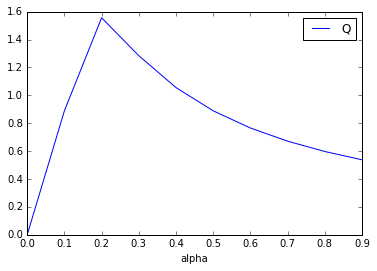

In [100]:
df_variations.plot(x='alpha', y='Q')

We find that for the case of $a = 1.3$ and $b = 1.5$ the firm will produce for every $\alpha \ge 0.2$. Furthermore, the optimal quanitity produced declines steeply for higher levels of $\alpha$

# First Stage
For the sensitivity analysis of the [first stage](#1stage), we will show the effect of varying the fixed cost on the entry decision of the firm.

In [101]:
#Case 1
F = 0.03

In [102]:
def entry (F,profit_2nd_stage):
    return 0 if profit_2nd_stage((optimize.fsolve(lambda q: fixed_point(q), initial_guess))[0], (optimize.fsolve(lambda q: fixed_point(q), initial_guess))[1], c_1, c_2) < F else 1

columns = ['alpha','[q_1,q_2]','Profits','entry']
df_variations = pd.DataFrame(columns=columns)
range_alpha = arange(0,1,0.1)
counter = 0
for i in range(len(range_alpha)):
    for j in range(1):
        counter = counter +1
        alpha = range_alpha[i]
        df_variations.loc[counter] = [alpha, (optimize.fsolve(lambda q: fixed_point(q), initial_guess)), profit_2nd_stage((optimize.fsolve(lambda q: fixed_point(q), initial_guess))[0], (optimize.fsolve(lambda q: fixed_point(q), initial_guess))[1], c_1, c_2), entry(F,profit_2nd_stage)]
print(df_variations)


    alpha                         [q_1,q_2]   Profits  entry
1     0.0                        [0.0, 0.0]  0.000000    0.0
2     0.1  [0.444444444444, 0.444444444444]  0.002963    0.0
3     0.2  [0.777777777778, 0.777777777778]  0.036296    1.0
4     0.3  [0.641975308642, 0.641975308642]  0.055638    1.0
5     0.4  [0.527777777778, 0.527777777778]  0.066852    1.0
6     0.5  [0.444444444444, 0.444444444444]  0.074074    1.0
7     0.6  [0.382716049383, 0.382716049383]  0.079095    1.0
8     0.7  [0.335600907029, 0.335600907029]  0.082782    1.0
9     0.8  [0.298611111111, 0.298611111111]  0.085602    1.0
10    0.9  [0.268861454047, 0.268861454047]  0.087828    1.0


At a low cost of entry, 0.03, we observe that the firms will enter the market at a low level of $\alpha$, since profits are positive at this point. 

In [103]:
#Case 2
F = 0.05

In [104]:
def entry (F,profit_2nd_stage):
    return 0 if profit_2nd_stage((optimize.fsolve(lambda q: fixed_point(q), initial_guess))[0], (optimize.fsolve(lambda q: fixed_point(q), initial_guess))[1], c_1, c_2) < F else 1

columns = ['alpha','[q_1,q_2]','Profits','entry']
df_variations = pd.DataFrame(columns=columns)
range_alpha = arange(0,1,0.1)
counter = 0
for i in range(len(range_alpha)):
    for j in range(1):
        counter = counter +1
        alpha = range_alpha[i]
        df_variations.loc[counter] = [alpha, (optimize.fsolve(lambda q: fixed_point(q), initial_guess)), profit_2nd_stage((optimize.fsolve(lambda q: fixed_point(q), initial_guess))[0], (optimize.fsolve(lambda q: fixed_point(q), initial_guess))[1], c_1, c_2), entry(F,profit_2nd_stage)]
print(df_variations)

    alpha                         [q_1,q_2]   Profits  entry
1     0.0                        [0.0, 0.0]  0.000000    0.0
2     0.1  [0.444444444444, 0.444444444444]  0.002963    0.0
3     0.2  [0.777777777778, 0.777777777778]  0.036296    0.0
4     0.3  [0.641975308642, 0.641975308642]  0.055638    1.0
5     0.4  [0.527777777778, 0.527777777778]  0.066852    1.0
6     0.5  [0.444444444444, 0.444444444444]  0.074074    1.0
7     0.6  [0.382716049383, 0.382716049383]  0.079095    1.0
8     0.7  [0.335600907029, 0.335600907029]  0.082782    1.0
9     0.8  [0.298611111111, 0.298611111111]  0.085602    1.0
10    0.9  [0.268861454047, 0.268861454047]  0.087828    1.0


We observe the same result for a slightly higher entry cost, 0.05. Profits are not altered from the previous case, so the firms will enter the market at $\alpha=0.1$, which is a low-yield, low-cost equilibrium. 

In [105]:
#Case 3
F = 0.07

In [106]:
def entry (F,profit_2nd_stage):
    return 0 if profit_2nd_stage((optimize.fsolve(lambda q: fixed_point(q), initial_guess))[0], (optimize.fsolve(lambda q: fixed_point(q), initial_guess))[1], c_1, c_2) < F else 1

columns = ['alpha','[q_1,q_2]','Profits','entry']
df_variations = pd.DataFrame(columns=columns)
range_alpha = arange(0,1,0.1)
counter = 0
for i in range(len(range_alpha)):
    for j in range(1):
        counter = counter +1
        alpha = range_alpha[i]
        df_variations.loc[counter] = [alpha, (optimize.fsolve(lambda q: fixed_point(q), initial_guess)), profit_2nd_stage((optimize.fsolve(lambda q: fixed_point(q), initial_guess))[0], (optimize.fsolve(lambda q: fixed_point(q), initial_guess))[1], c_1, c_2), entry(F,profit_2nd_stage)]
print(df_variations)

    alpha                         [q_1,q_2]   Profits  entry
1     0.0                        [0.0, 0.0]  0.000000    0.0
2     0.1  [0.444444444444, 0.444444444444]  0.002963    0.0
3     0.2  [0.777777777778, 0.777777777778]  0.036296    0.0
4     0.3  [0.641975308642, 0.641975308642]  0.055638    0.0
5     0.4  [0.527777777778, 0.527777777778]  0.066852    0.0
6     0.5  [0.444444444444, 0.444444444444]  0.074074    1.0
7     0.6  [0.382716049383, 0.382716049383]  0.079095    1.0
8     0.7  [0.335600907029, 0.335600907029]  0.082782    1.0
9     0.8  [0.298611111111, 0.298611111111]  0.085602    1.0
10    0.9  [0.268861454047, 0.268861454047]  0.087828    1.0


The same outcome is observed. 

In [107]:
#Case 4
F = 0.09

In [108]:
def entry (F,profit_2nd_stage):
    return 0 if profit_2nd_stage((optimize.fsolve(lambda q: fixed_point(q), initial_guess))[0], (optimize.fsolve(lambda q: fixed_point(q), initial_guess))[1], c_1, c_2) < F else 1

columns = ['alpha','[q_1,q_2]','Profits','entry']
df_variations = pd.DataFrame(columns=columns)
range_alpha = arange(0,1,0.1)
counter = 0
for i in range(len(range_alpha)):
    for j in range(1):
        counter = counter +1
        alpha = range_alpha[i]
        df_variations.loc[counter] = [alpha, (optimize.fsolve(lambda q: fixed_point(q), initial_guess)), profit_2nd_stage((optimize.fsolve(lambda q: fixed_point(q), initial_guess))[0], (optimize.fsolve(lambda q: fixed_point(q), initial_guess))[1], c_1, c_2), entry(F,profit_2nd_stage)]
print(df_variations)

    alpha                         [q_1,q_2]   Profits  entry
1     0.0                        [0.0, 0.0]  0.000000    0.0
2     0.1  [0.444444444444, 0.444444444444]  0.002963    0.0
3     0.2  [0.777777777778, 0.777777777778]  0.036296    0.0
4     0.3  [0.641975308642, 0.641975308642]  0.055638    0.0
5     0.4  [0.527777777778, 0.527777777778]  0.066852    0.0
6     0.5  [0.444444444444, 0.444444444444]  0.074074    0.0
7     0.6  [0.382716049383, 0.382716049383]  0.079095    0.0
8     0.7  [0.335600907029, 0.335600907029]  0.082782    0.0
9     0.8  [0.298611111111, 0.298611111111]  0.085602    0.0
10    0.9  [0.268861454047, 0.268861454047]  0.087828    0.0


Due to a higher entry cost, approximating the baseline case of $F=0.1$, the firms will only enter the market at $\alpha=0.2$. This shows how a greater entry cost will deter firms from joining the market at low yields. 

In [109]:
#Case 5
F = 0

In [110]:
def entry (F,profit_2nd_stage):
    return 0 if profit_2nd_stage((optimize.fsolve(lambda q: fixed_point(q), initial_guess))[0], (optimize.fsolve(lambda q: fixed_point(q), initial_guess))[1], c_1, c_2) < F else 1

columns = ['alpha','[q_1,q_2]','Profits','entry']
df_variations = pd.DataFrame(columns=columns)
range_alpha = arange(0,1,0.1)
counter = 0
for i in range(len(range_alpha)):
    for j in range(1):
        counter = counter +1
        alpha = range_alpha[i]
        df_variations.loc[counter] = [alpha, (optimize.fsolve(lambda q: fixed_point(q), initial_guess)), profit_2nd_stage((optimize.fsolve(lambda q: fixed_point(q), initial_guess))[0], (optimize.fsolve(lambda q: fixed_point(q), initial_guess))[1], c_1, c_2), entry(F,profit_2nd_stage)]
print(df_variations)

    alpha                         [q_1,q_2]   Profits  entry
1     0.0                        [0.0, 0.0]  0.000000    1.0
2     0.1  [0.444444444444, 0.444444444444]  0.002963    1.0
3     0.2  [0.777777777778, 0.777777777778]  0.036296    1.0
4     0.3  [0.641975308642, 0.641975308642]  0.055638    1.0
5     0.4  [0.527777777778, 0.527777777778]  0.066852    1.0
6     0.5  [0.444444444444, 0.444444444444]  0.074074    1.0
7     0.6  [0.382716049383, 0.382716049383]  0.079095    1.0
8     0.7  [0.335600907029, 0.335600907029]  0.082782    1.0
9     0.8  [0.298611111111, 0.298611111111]  0.085602    1.0
10    0.9  [0.268861454047, 0.268861454047]  0.087828    1.0


This is the extreme case, where there is no cost of entry. As expected, all firms will enter this market regardless of the level of $\alpha$. 

<a id='Conclusion'></a>

# Conclusion


Our conclusion is that yield uncertainty impacts equilibrium outcome in a cournot duopoly by two means. 

Firstly, low levels of yield can lead to no production in the [second stage](#2stage) due to expected profits that are lower than zero. Furthermore, for high levels of uncertainty yield quantity is declining in uncertainty yield. Meaning that for a large yield, less production is needed to reach an optimal quantity in the market, because a larger share of the targeted quanitity is actually produced.

In the sensitivity analysis we have shown that different values for the parameters $c_1$, $c_2$, $a$ and $b$ lead to different relations between $\alpha$ and the optimal production quantity $\overline{q_i}$. 

Secondly, low levels of  uncertainty yield can lead to firms not entering the market in the [first stage](#1stage).   
Low levels of uncertainty yield decrease the expected profits of the firm, thereby making it less profitable to enter the market when entry costs are in place. As shown in the [sensitivity analysis](#Sensa), when there are no entry costs, the yield does not influence entry decisions as in this case both firms will enter the market for each level of the uncertainty yield.

Suggestions for further research would be to extend the model to a model with multiple firms, and additional potential entrants.